In [1]:
# Import Packages which are required further
import math 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [7,4]            # Set figure Size
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(10,65))
sns.set_context('paper')                         # Set text style

<Figure size 1000x6500 with 0 Axes>

In [3]:
# Read Data using Panda package
attrition_data = pd.read_csv(r'HR_Employee_Attrition_Data.csv')

In [4]:
# head methode is used to see only 5 rows 
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# To see how many rows and columns available in dataset
attrition_data.shape

(2940, 35)

In [6]:
# To see the columns of dataset
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Null Value Checking

In [7]:
# No Null value Available in all columns
attrition_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Outlier Analysis

In [8]:
# Describe method is use for calculating Five number summary of numerical feature
attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df = pd.DataFrame(attrition_data.describe())

In [11]:
check_outlier = df.loc[['50%','mean','std']]

In [12]:
check_outlier

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529


In [13]:
# See Mean and std deviation for each feature
for i in check_outlier.columns:
    print(i)
    print((check_outlier[i]))
    print()

Age
50%     36.000000
mean    36.923810
std      9.133819
Name: Age, dtype: float64

DailyRate
50%     802.000000
mean    802.485714
std     403.440447
Name: DailyRate, dtype: float64

DistanceFromHome
50%     7.000000
mean    9.192517
std     8.105485
Name: DistanceFromHome, dtype: float64

Education
50%     3.000000
mean    2.912925
std     1.023991
Name: Education, dtype: float64

EmployeeCount
50%     1.0
mean    1.0
std     0.0
Name: EmployeeCount, dtype: float64

EmployeeNumber
50%     1470.500000
mean    1470.500000
std      848.849221
Name: EmployeeNumber, dtype: float64

EnvironmentSatisfaction
50%     3.000000
mean    2.721769
std     1.092896
Name: EnvironmentSatisfaction, dtype: float64

HourlyRate
50%     66.000000
mean    65.891156
std     20.325969
Name: HourlyRate, dtype: float64

JobInvolvement
50%     3.000000
mean    2.729932
std     0.711440
Name: JobInvolvement, dtype: float64

JobLevel
50%     2.000000
mean    2.063946
std     1.106752
Name: JobLevel, dtype: float

In [9]:
# From seeing the described data the value of 'std deviation' is zero for EmployeeCount and StandardHours column.
# means columns having same value thats why drop this column
attrition_data = attrition_data.drop(['EmployeeCount','StandardHours'], axis = 1)

In [21]:
attrition_data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,3,3,0,8,3,3,8,7,3,0


In [23]:
# To find How Many Categorical Columns
attrition_data.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,2466,2086,1922,1212,1764,652,1346,2940,2108


## Target Analysis

In [24]:
# Checking Data is Balanced or Not
# Target variable is Categorical or Continuous

In [25]:
attrition_data.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

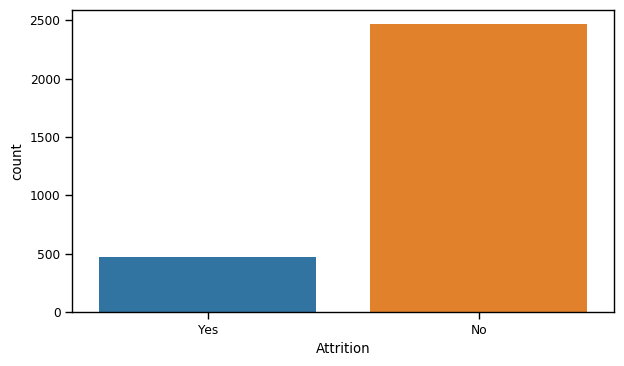

In [26]:
sns.countplot(attrition_data['Attrition'])

In [46]:
# Attrition Rate
att_yes = attrition_data[attrition_data['Attrition'] == 'Yes']['Attrition'].count()/len(attrition_data)*100
att_no = attrition_data[attrition_data['Attrition'] == 'No']['Attrition'].count()/len(attrition_data)*100
print('Attrition Rate of Yes',att_yes)
print('Attrition Rate of No',att_no)

Attrition Rate of Yes 16.122448979591837
Attrition Rate of No 83.87755102040816


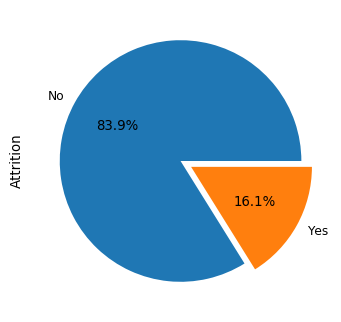

In [43]:
explode = [0,0.1]
attrition_data['Attrition'].value_counts().plot.pie(autopct = '%1.1f%%',explode = explode)

## Univariate Analysis

## Age

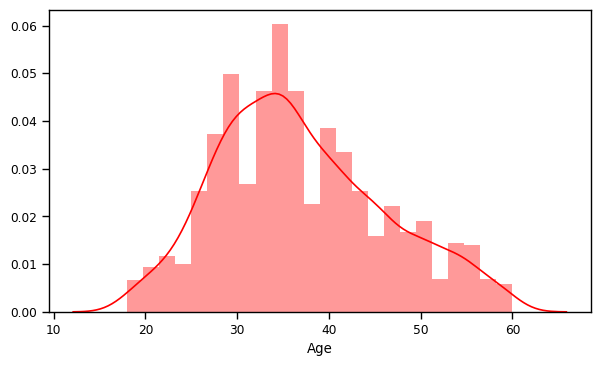

In [49]:
#Age is Somewhat Normally Distributed
sns.distplot( attrition_data['Age'], color = 'red')

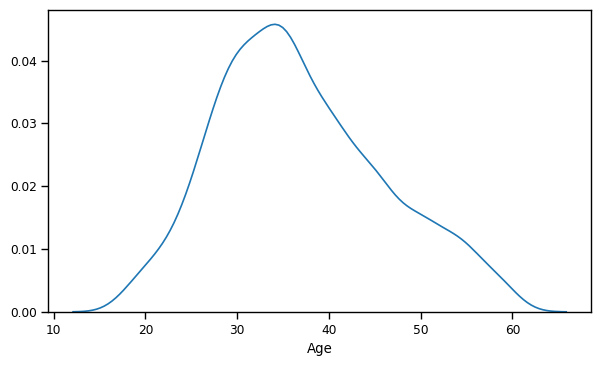

In [50]:
# From the distribution of data it is looks like Normal Distribution

sns.distplot( attrition_data['Age'],hist = False)

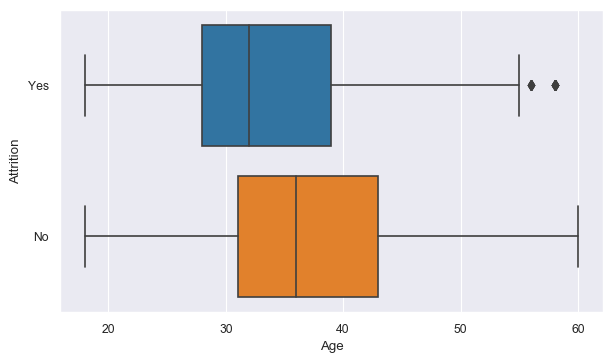

In [135]:
sns.set_style('darkgrid')
sns.boxplot(x = 'Age' ,y = 'Attrition', data = attrition_data)


## Insight
#### From the Box plot we can say that age between 27 to 31 having high attrition.

## DailyRate

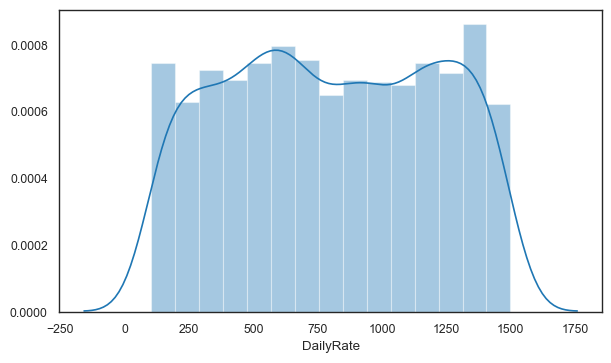

In [72]:
sns.set_style('white')
sns.distplot(attrition_data['DailyRate'])

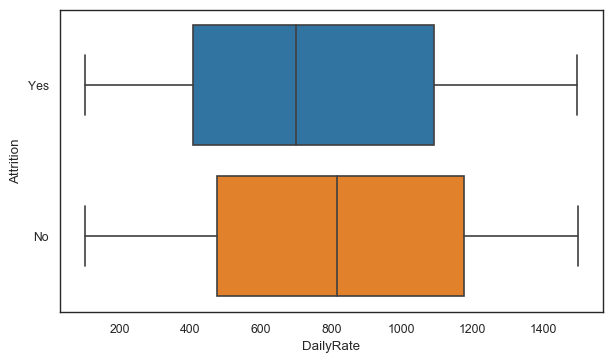

In [74]:
sns.boxplot(x = 'DailyRate' ,y = 'Attrition', data = attrition_data, dodge = True)

## Insight
#### From the box plot we can say the 'DailyRate'  not play important role 

## BusinessTravel

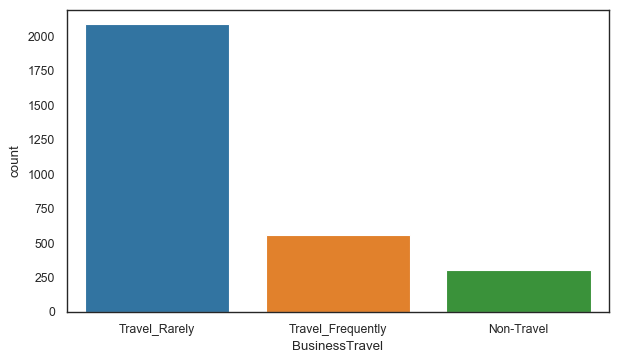

In [77]:
sns.countplot(attrition_data['BusinessTravel'])

In [76]:
attrition_data['BusinessTravel'].value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

In [84]:
print('Value Counts')
print(attrition_data['BusinessTravel'].value_counts())
print('\nPercentage')
print((attrition_data['BusinessTravel'].value_counts()/len(attrition_data['BusinessTravel'])*100))

Value Counts
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

Percentage
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64


In [87]:
# Attrition Rate
att_rate = pd.crosstab(attrition_data['Attrition'],columns = 'Counts')
att_rate/len(attrition_data)*100


# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [128]:
tab = pd.crosstab(attrition_data['BusinessTravel'],attrition_data['Attrition'],normalize='index')*100
tab

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


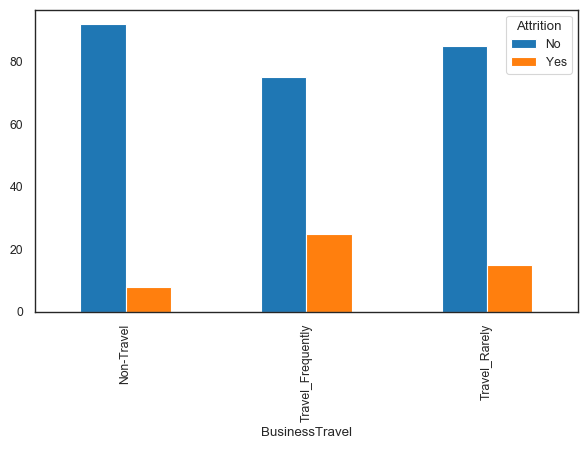

In [104]:
tab.plot(kind = 'bar')
plt.show()

## Insight
### Travel_Rarely
#### we can see that Travel_Rarely has 14% attrition rate, 
#### this is somewhat similar to attrition rate of dataset(16%). it not more impact on attrition

### Non_Travel
#### we can see that non_travel has an 8% that is very low compared to attrition rate of dataset(16%)
#### hence we can say that non_travel reduces attrition

### Travel_frequently
#### we can see that Travel_frequently has an 24% attrition rate which is very higher that the attrition rate of dataset(16%)
#### hence we can conclude that Travel_frequently increases attrition

## Department

In [112]:
# find its numerical or categorical column
attrition_data['Department'].unique().size

# it is Categorical Variable

3

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


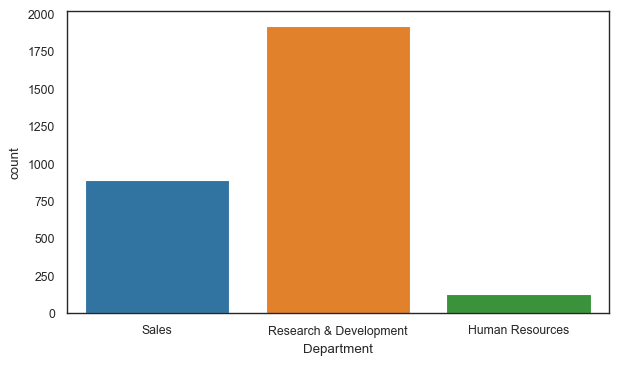

In [117]:
print(attrition_data['BusinessTravel'].value_counts())
sns.countplot(attrition_data['Department'])

In [118]:
print('Value Counts')
print(attrition_data['Department'].value_counts())
print('\nPercentage')
print((attrition_data['Department'].value_counts()/len(attrition_data['Department'])*100))

Value Counts
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

Percentage
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64


In [119]:
# Attrition Rate
att_rate = pd.crosstab(attrition_data['Attrition'],columns = 'Counts')
att_rate/len(attrition_data)*100


# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [126]:
tab = pd.crosstab(attrition_data['Department'], attrition_data['Attrition'],normalize = 'index')*100
tab

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


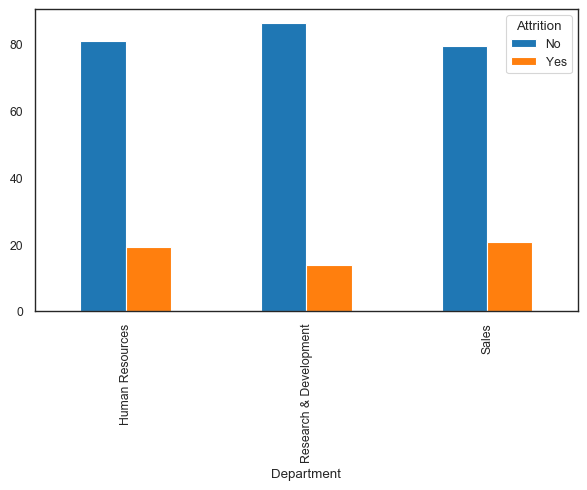

In [127]:
tab.plot(kind = 'bar')

## Insight

### Human Resources
#### we can see that Human Resources has 19% attrition rate, 
#### this is some higher than attrition rate of dataset

### Research & Development
#### we can see that Research & Development has an 13% that is very low compared to attrition rate of dataset(16%)
#### hence we can say that non_travel reduces attrition

### Sales
#### we can see that sales has an 20% attrition rate which is very higher that the attrition rate of dataset(16%)
#### hence we can conclude that sales increases attrition

## DistanceFromHome

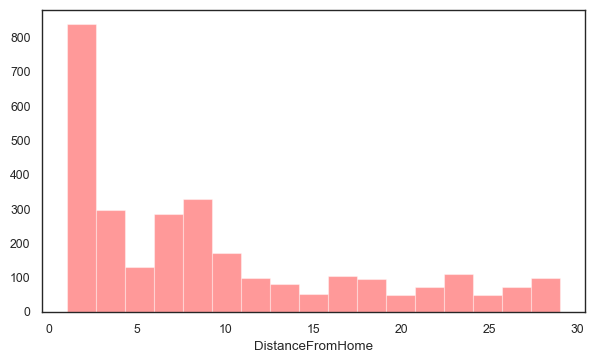

In [132]:
sns.distplot(attrition_data['DistanceFromHome'], kde = False, color = 'red')

# DistanceFromHome variable is left skewed distribution
# means most of its values are located at the left side

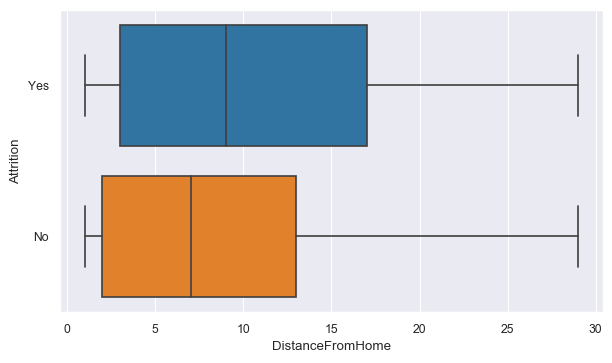

In [136]:
sns.boxplot(attrition_data['DistanceFromHome'], attrition_data['Attrition'])

## Insight

#### from the box plot we say that less office Distance From Home is less attrition
#### and when office Distance From Home increases attrition of employ also increases

## Education

In [139]:
# this is categoriacal variable having 5 categary 
attrition_data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

3    1144
4     796
2     564
1     340
5      96
Name: Education, dtype: int64


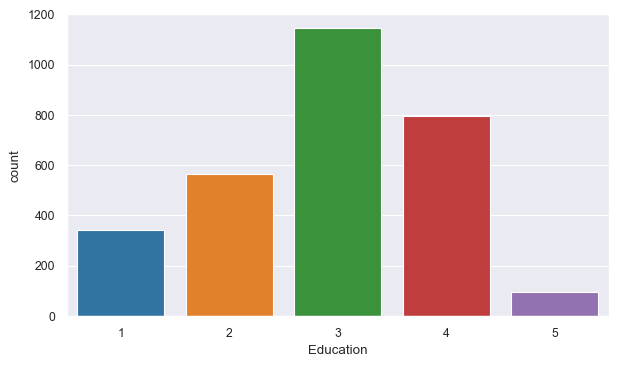

In [188]:
print(attrition_data['Education'].value_counts())
sns.countplot(attrition_data['Education'])

In [142]:
print('Value Counts')
print(attrition_data['Department'].value_counts())
print('\nPercentage')
print((attrition_data['Department'].value_counts()/len(attrition_data['Department'])*100))

Value Counts
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

Percentage
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64


In [143]:
# Attrition Rate
att_rate = pd.crosstab(attrition_data['Attrition'],columns = 'Counts')
att_rate/len(attrition_data)*100


# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [145]:
tab = pd.crosstab(attrition_data['Education'],attrition_data['Attrition'],normalize='index')*100
tab

Attrition,No,Yes
Education,,
1,81.764706,18.235294
2,84.397163,15.602837
3,82.692308,17.307692
4,85.427136,14.572864
5,89.583333,10.416667


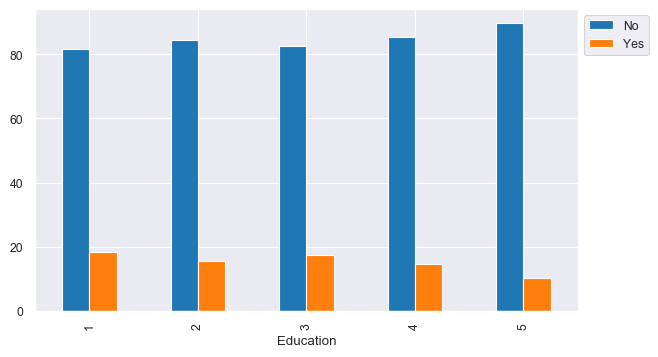

In [148]:
tab.plot(kind = 'bar')
plt.legend(bbox_to_anchor=(1,1))

## Insight
#### Education variable does not play important role in attrition

## EducationField

In [154]:
attrition_data['EducationField'].unique().size

# there is 6 unique values thus, it is categorical variable

6

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64


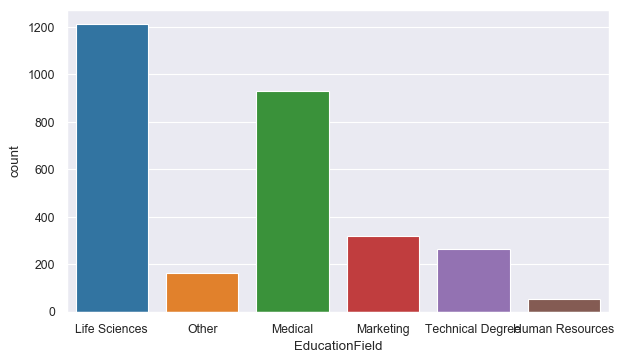

In [160]:
print(attrition_data['EducationField'].value_counts())
sns.countplot(attrition_data['EducationField'])

In [161]:
print('Value Counts')
print(attrition_data['EducationField'].value_counts())
print('\nPercentage')
print((attrition_data['EducationField'].value_counts()/len(attrition_data['EducationField'])*100))

Value Counts
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

Percentage
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: EducationField, dtype: float64


In [162]:
# Attrition Rate of whole data
att_rate = pd.crosstab(attrition_data['Attrition'],columns = 'Counts')
att_rate/len(attrition_data)*100


# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [163]:
tab = pd.crosstab(attrition_data['EducationField'], attrition_data['Attrition'],normalize = 'index')*100
tab

Attrition,No,Yes
EducationField,,
Human Resources,74.074074,25.925926
Life Sciences,85.313531,14.686469
Marketing,77.987421,22.012579
Medical,86.422414,13.577586
Other,86.585366,13.414634
Technical Degree,75.757576,24.242424


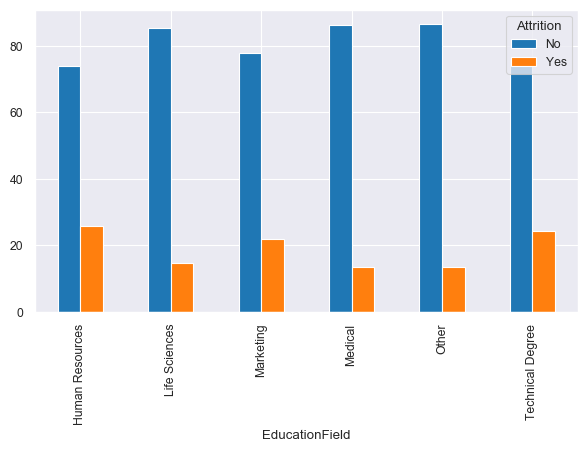

In [164]:
tab.plot(kind = 'bar')

## Insight
#### we can see that 'Human Resources'(25%), Marketing(22%),Technical Degree(24%) having high attrition rate. 
#### hence we can say that these 3 education category result in higher attrition.

## EnvironmentSatisfaction

In [184]:
attrition_data['EnvironmentSatisfaction'].unique().size

4

3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64


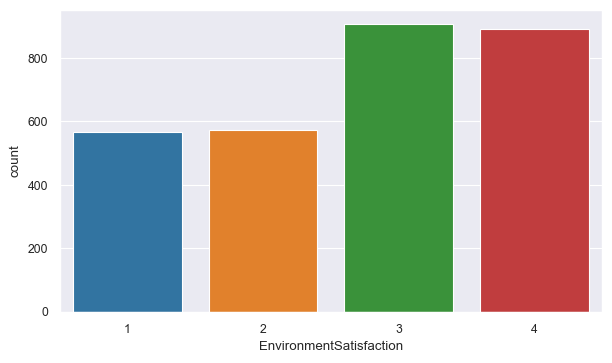

In [187]:
print(attrition_data['EnvironmentSatisfaction'].value_counts())
sns.countplot(attrition_data['EnvironmentSatisfaction'])

In [6]:
print('counts')
print(attrition_data['EnvironmentSatisfaction'].value_counts())
print()
print('\nPercentage')
print((attrition_data['EnvironmentSatisfaction'].value_counts()/len(attrition_data['EnvironmentSatisfaction'])*100))

counts
3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64


Percentage
3    30.816327
4    30.340136
2    19.523810
1    19.319728
Name: EnvironmentSatisfaction, dtype: float64


In [196]:
# Attrition Rate of whole data
att_rate = pd.crosstab(attrition_data['Attrition'], columns = 'Counts')
att_rate/len(attrition_data)*100

# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [197]:
tab = pd.crosstab(attrition_data['EnvironmentSatisfaction'], attrition_data['Attrition'],normalize = 'index')*100
tab

Attrition,No,Yes
EnvironmentSatisfaction,,
1,74.647887,25.352113
2,85.017422,14.982578
3,86.313466,13.686534
4,86.547085,13.452915


## Insight
#### we can see that first category of Environment Satisfaction variable having high attrition rate(25%),
#### it is pretty high with respect attrition rate of dataset(16%). 
#### hence we can say that these First category result in higher attrition.

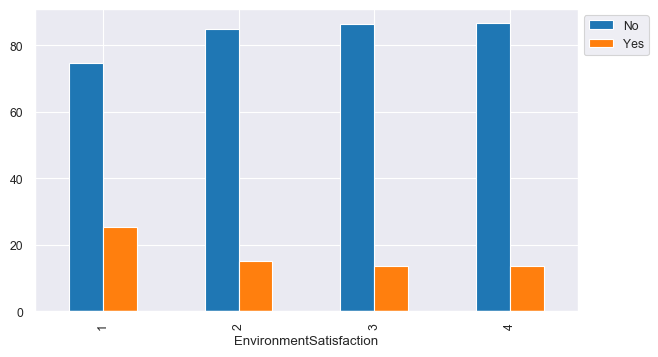

In [200]:
tab.plot(kind = 'bar')
plt.legend(bbox_to_anchor = (1,1))

## Gender

In [203]:
attrition_data['Gender'].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

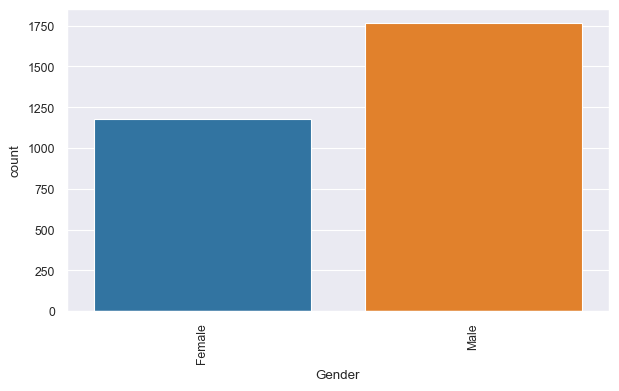

In [213]:
sns.countplot(attrition_data['Gender'])
plt.xticks(rotation=90)

In [212]:
print('Counts')
print(attrition_data['Gender'].value_counts())
print('\nPercentage')
print(attrition_data['Gender'].value_counts()/len(attrition_data['Gender'])*100)

Counts
Male      1764
Female    1176
Name: Gender, dtype: int64

Percentage
Male      60.0
Female    40.0
Name: Gender, dtype: float64


In [215]:
# Attrition Rate of whole data
att_rate = pd.crosstab(attrition_data['Attrition'], columns = 'Counts')
att_rate/len(attrition_data)*100

# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [214]:
tab = pd.crosstab(attrition_data['Gender'],attrition_data['Attrition'],normalize = 'index')*100
tab

Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


## Insight
#### Gender male(14%) and female(17%) attrition rate is less than attrition rate of data set
#### thus, Gender is not play important role in attrition 

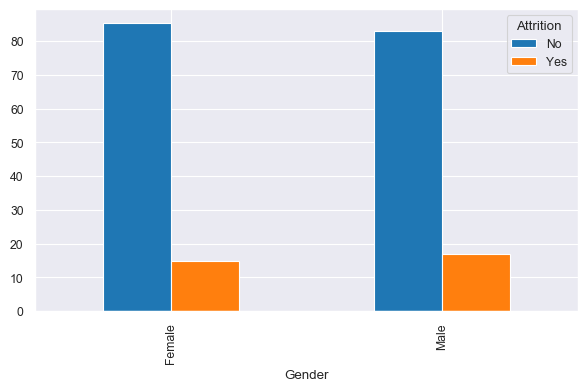

In [216]:
tab.plot(kind='bar')

## HourlyRate

In [8]:
attrition_data['HourlyRate'].unique().size

# HourlyRate is having 71 value means HourlyRate is numerical column

71

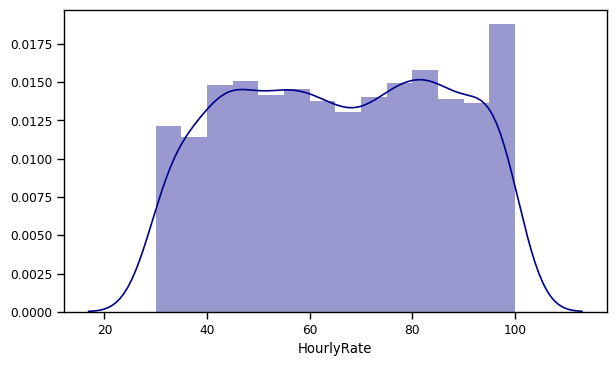

In [9]:
#Age is Somewhat Normally Distributed
sns.distplot( attrition_data['HourlyRate'], color = 'darkblue')

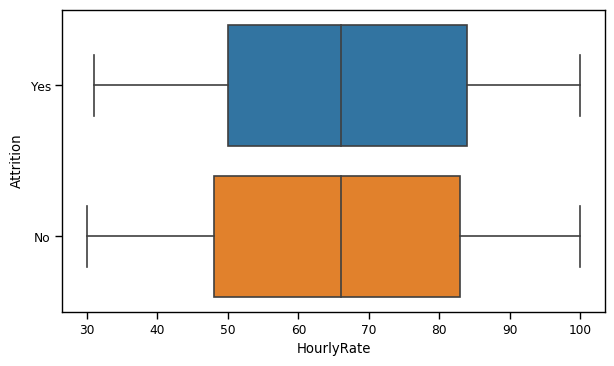

In [10]:
sns.boxplot(x = 'HourlyRate', y = 'Attrition', data = attrition_data)

### Insight

#### since Both box are somewhat similar.
#### Hourly Rate does not play a important role in influencing attrition

## Job Involvement

In [12]:
attrition_data['JobInvolvement'].unique().size

# this is Categorical Column

4

3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64


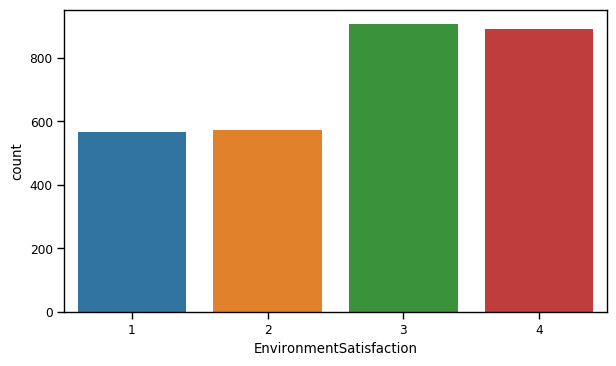

In [27]:
counts =attrition_data['JobInvolvement'].value_counts()
print(attrition_data['EnvironmentSatisfaction'].value_counts())
sns.countplot(attrition_data['EnvironmentSatisfaction'])

In [26]:
print('Value Counts')
print(counts)
print('\nPercentage')
print(attrition_data['JobInvolvement'].value_counts()/len(attrition_data['JobInvolvement'])*100)

Value Counts
3    1736
2     750
4     288
1     166
Name: JobInvolvement, dtype: int64

Percentage
3    59.047619
2    25.510204
4     9.795918
1     5.646259
Name: JobInvolvement, dtype: float64


In [28]:
# Attrition Rate of whole data
att_rate = pd.crosstab(attrition_data['Attrition'], columns = 'Counts')
att_rate/len(attrition_data)*100

# Here we can see 16% of total dataset has attritioned and approx 84% has remained in the job

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [31]:
tab = pd.crosstab(attrition_data['JobInvolvement'], attrition_data['Attrition'], normalize='index')*100
tab

Attrition,No,Yes
JobInvolvement,,
1,66.265060,33.734940
2,81.066667,18.933333
3,85.599078,14.400922
4,90.972222,9.027778


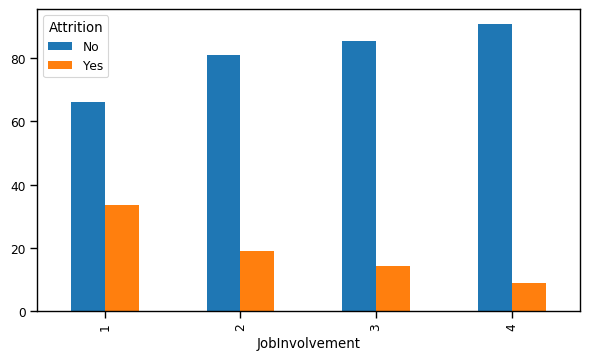

In [33]:
tab.plot(kind = 'bar')

## Insights

#### we can see that first category of Job Involvement variable having high attrition rate(25%),
#### first category attrition rate(34%) very high with respect attrition rate of dataset(16%). 
#### hence we can say that these First category result in higher attrition.

## JobLevel

In [36]:
attrition_data['JobLevel'].unique().size

5

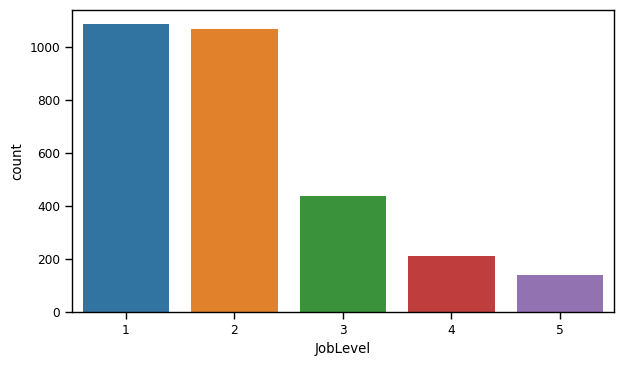

In [40]:
counts = attrition_data['JobLevel'].value_counts()
sns.countplot(attrition_data['JobLevel'])

In [43]:
print('Counts')
print(counts)
print('\nPercentage')
print(attrition_data['JobLevel'].value_counts()/len(attrition_data['JobLevel'])*100)

Counts
1    1086
2    1068
3     436
4     212
5     138
Name: JobLevel, dtype: int64

Percentage
1    36.938776
2    36.326531
3    14.829932
4     7.210884
5     4.693878
Name: JobLevel, dtype: float64


In [45]:
att_rate = pd.crosstab(attrition_data['Attrition'], columns = 'Counts')
att_rate/len(attrition_data['Attrition'])*100

col_0,Counts
Attrition,
No,83.877551
Yes,16.122449


In [46]:
tab = pd.crosstab(attrition_data['JobLevel'], attrition_data['Attrition'], normalize='index')*100
tab

Attrition,No,Yes
JobLevel,,
1,73.664825,26.335175
2,90.262172,9.737828
3,85.321101,14.678899
4,95.283019,4.716981
5,92.753623,7.246377


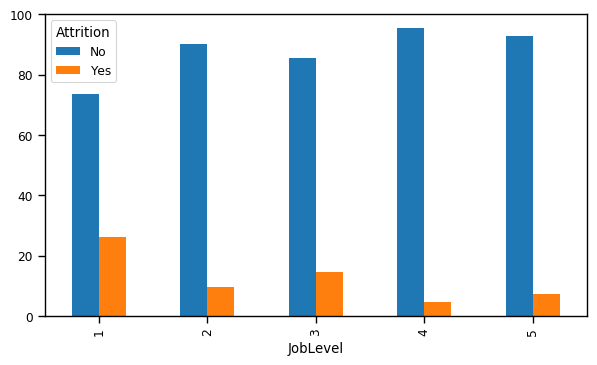

In [47]:
tab.plot(kind = 'bar')

## Insights

#### we can see that first category of Job Level variable having high attrition rate(25%),
#### first category attrition rate(26%) very high with respect attrition rate of dataset(16%). 
#### hence we can say that these First category result in higher attrition.

## JobRole

In [50]:
attrition_data['JobRole'].unique().size

9

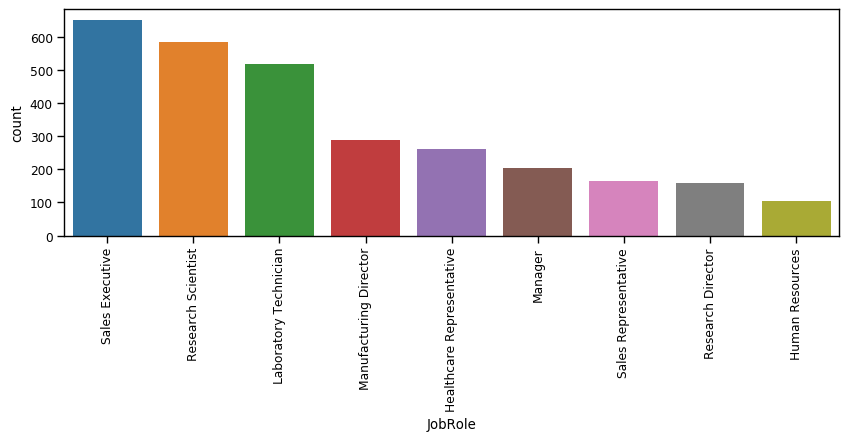

In [57]:
plt.figure(figsize =(10,3))
plt.xticks(rotation=90)
counts = attrition_data['JobRole'].value_counts()
sns.countplot(attrition_data['JobRole'])

In [60]:
print('Counts')
print(counts)
print('\nPercentage')
print(counts/len(attrition_data['JobRole'])*100)

Counts
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

Percentage
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: JobRole, dtype: float64


In [61]:
tab = pd.crosstab(attrition_data['JobRole'],attrition_data['Attrition'],normalize='index')*100
tab

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


<Figure size 1500x500 with 0 Axes>

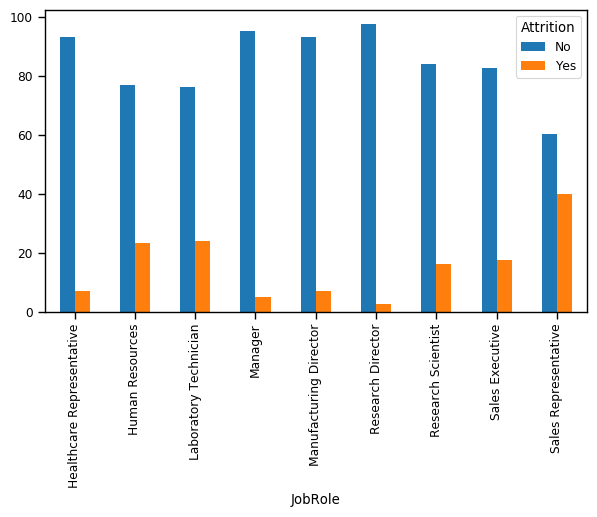

In [67]:
plt.figure(figsize = (15,5))
tab.plot(kind = 'bar')

## Insights

#### we can see that Sales Executieve(40%) of Job role variable having high attrition rate(40%),
#### and human Resources(23%), Laboratory Technician(23%) having somewhat high attrition rate
#### hence we can say that Sales Executieve, human Resources(23%) and Laboratory Technician(23%) these  result in higher attrition.

## JobSatisfaction

In [68]:
attrition_data['JobSatisfaction'].unique().size

4

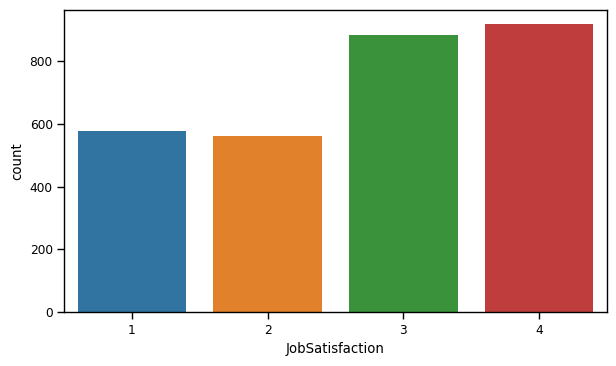

In [70]:
counts = attrition_data['JobSatisfaction'].value_counts()
sns.countplot(attrition_data['JobSatisfaction'])

In [71]:
print('Counts')
print(counts)
print('\nPercent')
print(counts/len(attrition_data['JobSatisfaction'])*100)

Counts
4    918
3    884
1    578
2    560
Name: JobSatisfaction, dtype: int64

Percent
4    31.224490
3    30.068027
1    19.659864
2    19.047619
Name: JobSatisfaction, dtype: float64


In [72]:
tab = pd.crosstab(attrition_data['JobSatisfaction'], attrition_data['Attrition'], normalize='index')*100
tab

Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


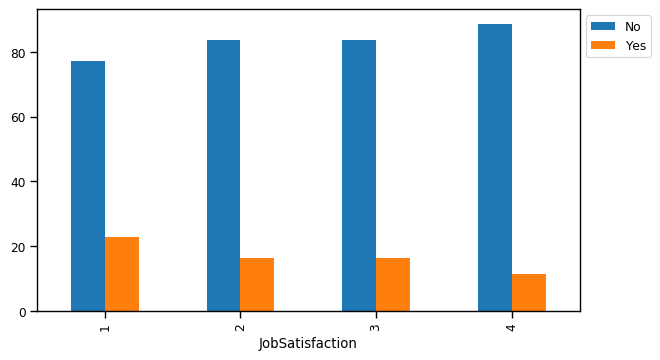

In [77]:
tab.plot(kind = 'bar')
plt.legend(bbox_to_anchor = (1,1))

## Insight

#### we can see that first category of Job Satisfaction variable having high attrition rate(22%),
#### first category attrition rate(22%) is very high with respect attrition rate of dataset(16%). 
#### hence we can say that these First category result in higher attrition.

## MaritalStatus

In [79]:
attrition_data['MaritalStatus'].unique().size

3

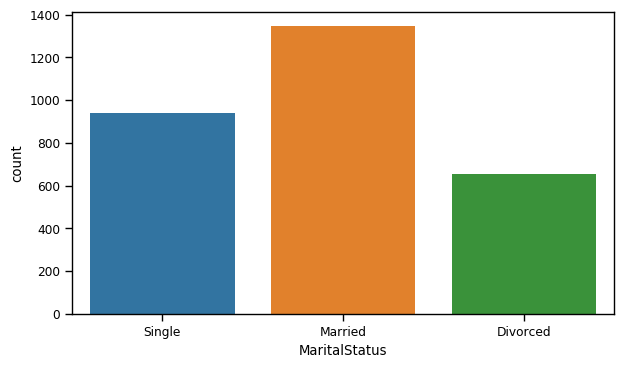

In [83]:
counts = attrition_data['MaritalStatus'].value_counts()
sns.countplot(attrition_data['MaritalStatus'])

In [84]:
print('Counts')
print(counts)
print('\nPercent')
print(counts/len(attrition_data['MaritalStatus'])*100)

Counts
Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

Percent
Married     45.782313
Single      31.972789
Divorced    22.244898
Name: MaritalStatus, dtype: float64


In [85]:
tab = pd.crosstab(attrition_data['MaritalStatus'], attrition_data['Attrition'], normalize='index')*100
tab

Attrition,No,Yes
MaritalStatus,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


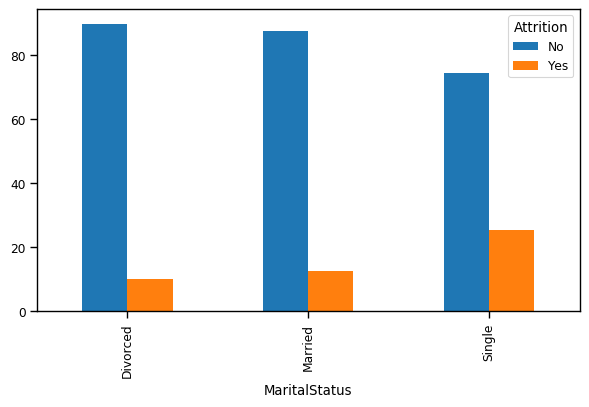

In [86]:
tab.plot(kind = 'bar')

## Insight

#### we can see that Single Employee having high attrition rate(25%),
#### hence we can say that Single employee have high attrition.

## MonthlyIncome

In [88]:
attrition_data['MonthlyIncome'].unique().size

# it is Categorical Variable

1349

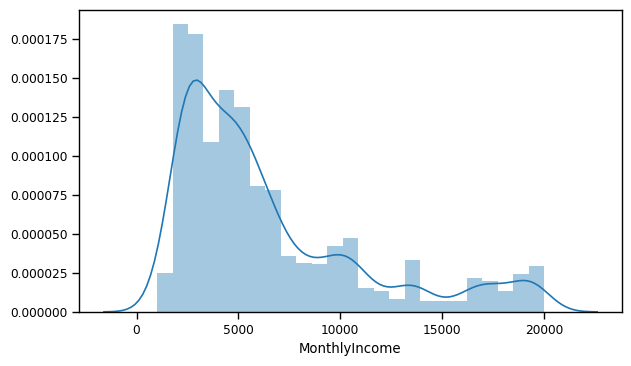

In [89]:
sns.distplot(attrition_data['MonthlyIncome'])

# this variable is left skewed distribution

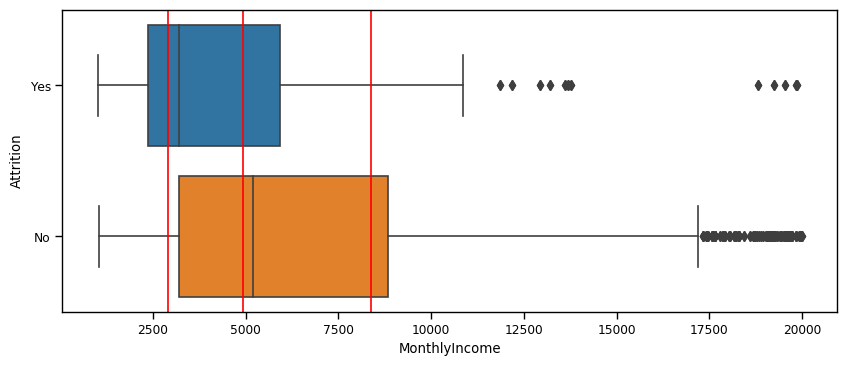

In [98]:
plt.figure(figsize = (10,4))
sns.boxplot(y = attrition_data['Attrition'], x = attrition_data['MonthlyIncome'])
plt.axvline(x = np.median(attrition_data['MonthlyIncome']),color = 'red')
plt.axvline(x = np.percentile(attrition_data['MonthlyIncome'],25),color = 'red' )
plt.axvline(x = np.percentile(attrition_data['MonthlyIncome'],75), color = 'red')

## Insight

#### Monthly Income Variable is affected by attrition, employee who left the job gets less salary compare to mean salary is 6500.
#### There is attrition towords the lower end of monthly income

## OverTime

In [99]:
attrition_data['OverTime'].unique().size

2

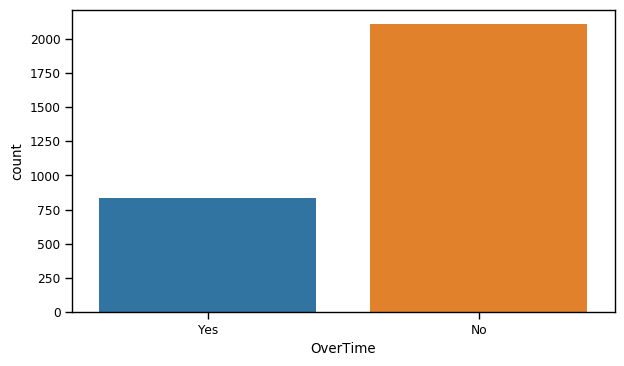

In [101]:
counts = attrition_data['OverTime'].value_counts()
sns.countplot(attrition_data['OverTime'])

In [102]:
print('Counts')
print(counts)
print('\nPercent')
print(counts/len(attrition_data['OverTime'])*100)

Counts
No     2108
Yes     832
Name: OverTime, dtype: int64

Percent
No     71.70068
Yes    28.29932
Name: OverTime, dtype: float64


In [103]:
tab = pd.crosstab(attrition_data['OverTime'], attrition_data['Attrition'], normalize='index')*100
tab

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


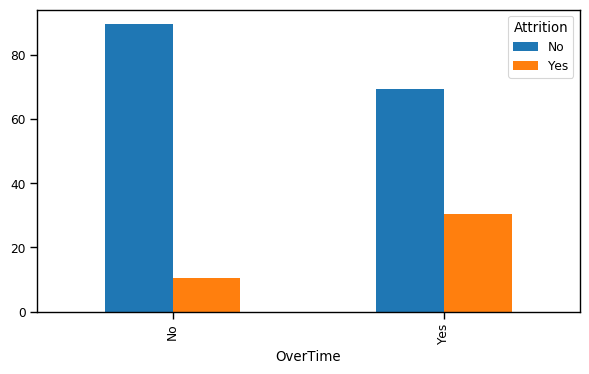

In [105]:
tab.plot(kind = 'bar')

## Insight

#### we can see that when overtime is Yes, the attrition rate is 30%. 
#### This is very high compared to attrition rate of whole data which is 16%
#### Hence we can say that working OverTime leads to increase attrition

## PercentSalaryHike

In [107]:
attrition_data['PercentSalaryHike'].unique().size

15

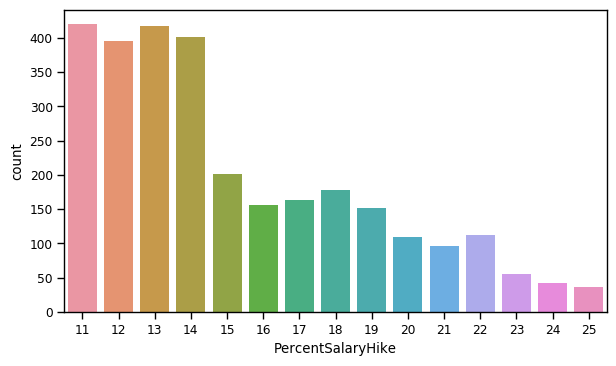

In [109]:
counts = attrition_data['PercentSalaryHike'].value_counts()
sns.countplot(attrition_data['PercentSalaryHike'])

In [113]:
tab = pd.crosstab(attrition_data['PercentSalaryHike'], attrition_data['Attrition'], normalize = 'index')*100
tab

Attrition,No,Yes
PercentSalaryHike,,
11,80.476190,19.523810
12,83.333333,16.666667
13,83.732057,16.267943
14,88.059701,11.940299
15,82.178218,17.821782
16,82.051282,17.948718
17,82.926829,17.073171
18,85.393258,14.606742
19,88.157895,11.842105


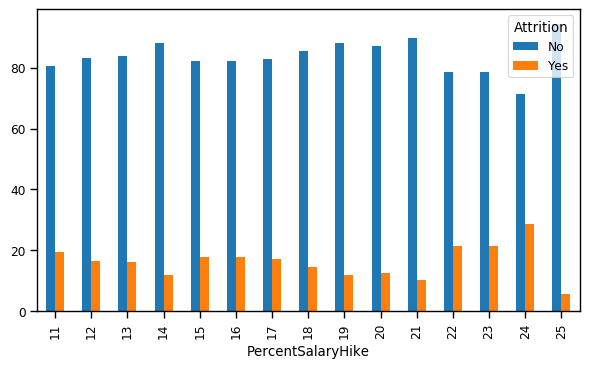

In [116]:
tab.plot(kind = 'bar')

# we can see that percent salary hike 24 has high attrition rate(28%)

## TotalWorkingYears

In [120]:
attrition_data['TotalWorkingYears'].unique().size

40

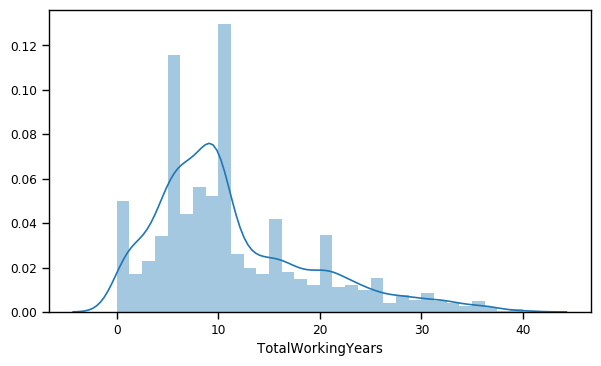

In [123]:
sns.distplot(attrition_data['TotalWorkingYears'])

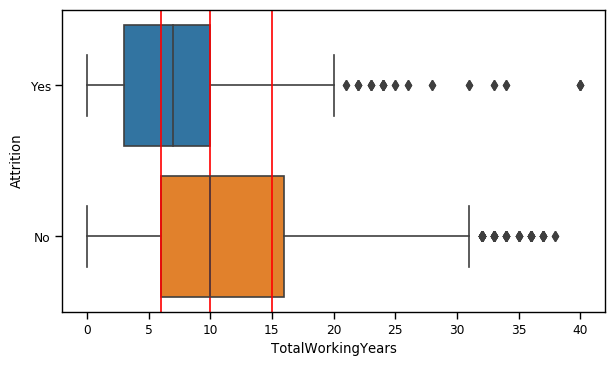

In [128]:
sns.boxplot(attrition_data['TotalWorkingYears'], attrition_data['Attrition'])
plt.axvline(x= np.median(attrition_data['TotalWorkingYears']),color = 'red')
plt.axvline(x= np.percentile(attrition_data['TotalWorkingYears'],25), color = 'red')
plt.axvline(x= np.percentile(attrition_data['TotalWorkingYears'],75),color = 'red')

## Insight

#### Employee with less total Working year Experience has more attrition rate

## YearsAtCompany

In [130]:
attrition_data['YearsAtCompany'].unique().size

37

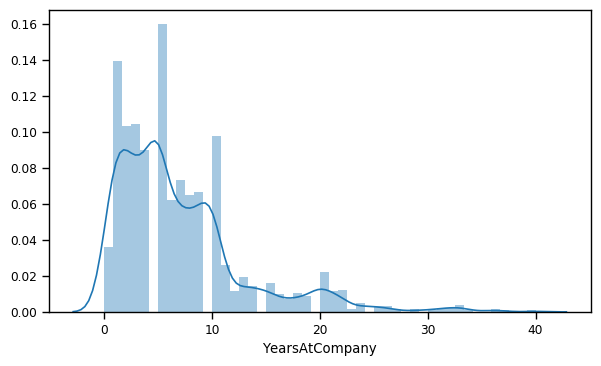

In [131]:
sns.distplot(attrition_data['YearsAtCompany'])

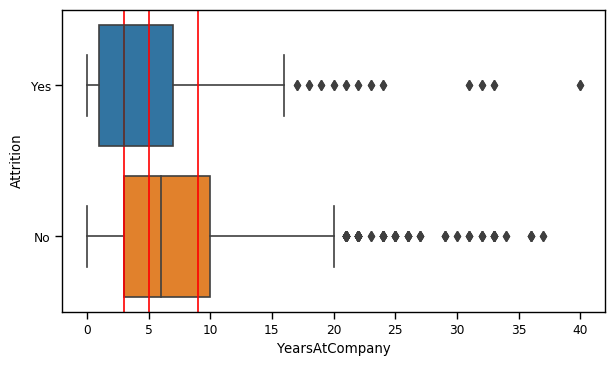

In [133]:
sns.boxplot(attrition_data['YearsAtCompany'], attrition_data['Attrition'])
plt.axvline(x= np.median(attrition_data['YearsAtCompany']),color = 'red')
plt.axvline(x= np.percentile(attrition_data['YearsAtCompany'],25), color = 'red')
plt.axvline(x= np.percentile(attrition_data['YearsAtCompany'],75),color = 'red')

## Insight

#### we can see that newly join employee have high attrition rate

## YearsSinceLastPromotion

In [135]:
attrition_data['YearsSinceLastPromotion'].unique().size

16

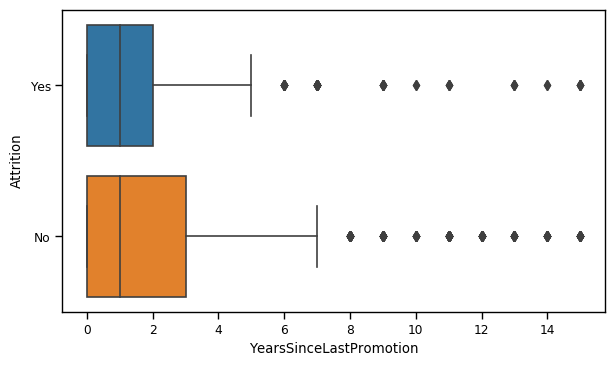

In [136]:
sns.boxplot(attrition_data['YearsSinceLastPromotion'], attrition_data['Attrition'])

## Insight

#### No Insight from year since last promotion
#### it not play important role for attrition

## YearsWithCurrManager

In [140]:
attrition_data['YearsWithCurrManager'].unique().size

18

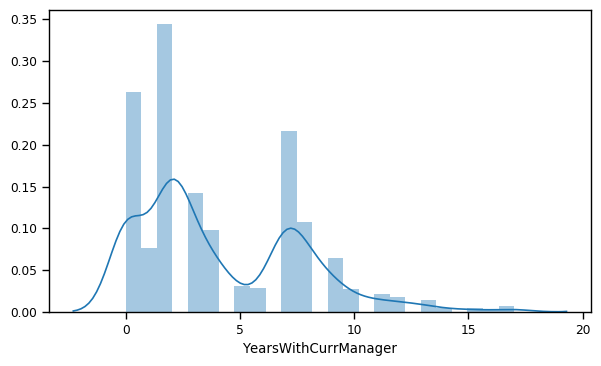

In [141]:
sns.distplot(attrition_data['YearsWithCurrManager'])

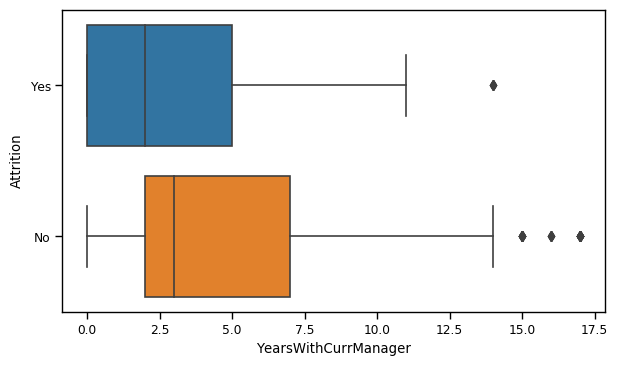

In [139]:
sns.boxplot(attrition_data['YearsWithCurrManager'],attrition_data['Attrition'])

## Insight
#### from the box plot we can say that zero to two year with current manager have high attrition rate. 

# From The all above we can say that 'Daily Rate','Education','Gender','Hourly Rate','Year since last Promotion' this columns not play important roll for attrition

In [10]:
attrition_data = attrition_data.drop(['DailyRate','Education','Gender','HourlyRate','YearsSinceLastPromotion'], axis = 1)

In [12]:
attrition_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,3,2,...,11,3,1,0,8,0,1,6,4,5
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,2,2,...,23,4,4,1,10,3,3,10,7,7
2,37,Yes,Travel_Rarely,Research & Development,2,Other,3,4,2,1,...,15,3,2,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,4,4,3,1,...,11,3,3,0,8,3,3,8,7,0
4,27,No,Travel_Rarely,Research & Development,2,Medical,5,1,3,1,...,12,3,4,1,6,3,3,2,2,2


In [13]:
# Find Correlation Matrix using Pearson Correlation
cormat = attrition_data.corr()
cormat

,Age,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Age,1.000000,-0.001686,-0.005175,0.010146,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.202089
DistanceFromHome,-0.001686,1.000000,0.016464,-0.016075,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.014406
EmployeeNumber,-0.005175,0.016464,1.000000,0.008712,-0.003552,-0.009020,-0.022970,-0.007188,0.006177,-0.000345,-0.006685,-0.010338,-0.034827,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004716
EnvironmentSatisfaction,0.010146,-0.016075,0.008712,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,-0.004999
JobInvolvement,0.029820,0.008783,-0.003552,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,0.025976
JobLevel,0.509604,0.005303,-0.009020,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.375281
JobSatisfaction,-0.004892,-0.003669,-0.022970,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.027656
MonthlyIncome,0.497855,-0.017014,-0.007188,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344079
MonthlyRate,0.028051,0.027473,0.006177,0.037600,-0.016322,0.039563,0.000644,0.034814,1.000000,0.017521,-0.006429,-0.009811,-0.004085,-0.034323,0.026442,0.001467,0.007963,-0.023655,-0.012815,-0.036746
NumCompaniesWorked,0.299635,-0.029251,-0.000345,0.012594,0.015012,0.142501,-0.055699,0.149515,0.017521,1.000000,-0.010238,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.110319


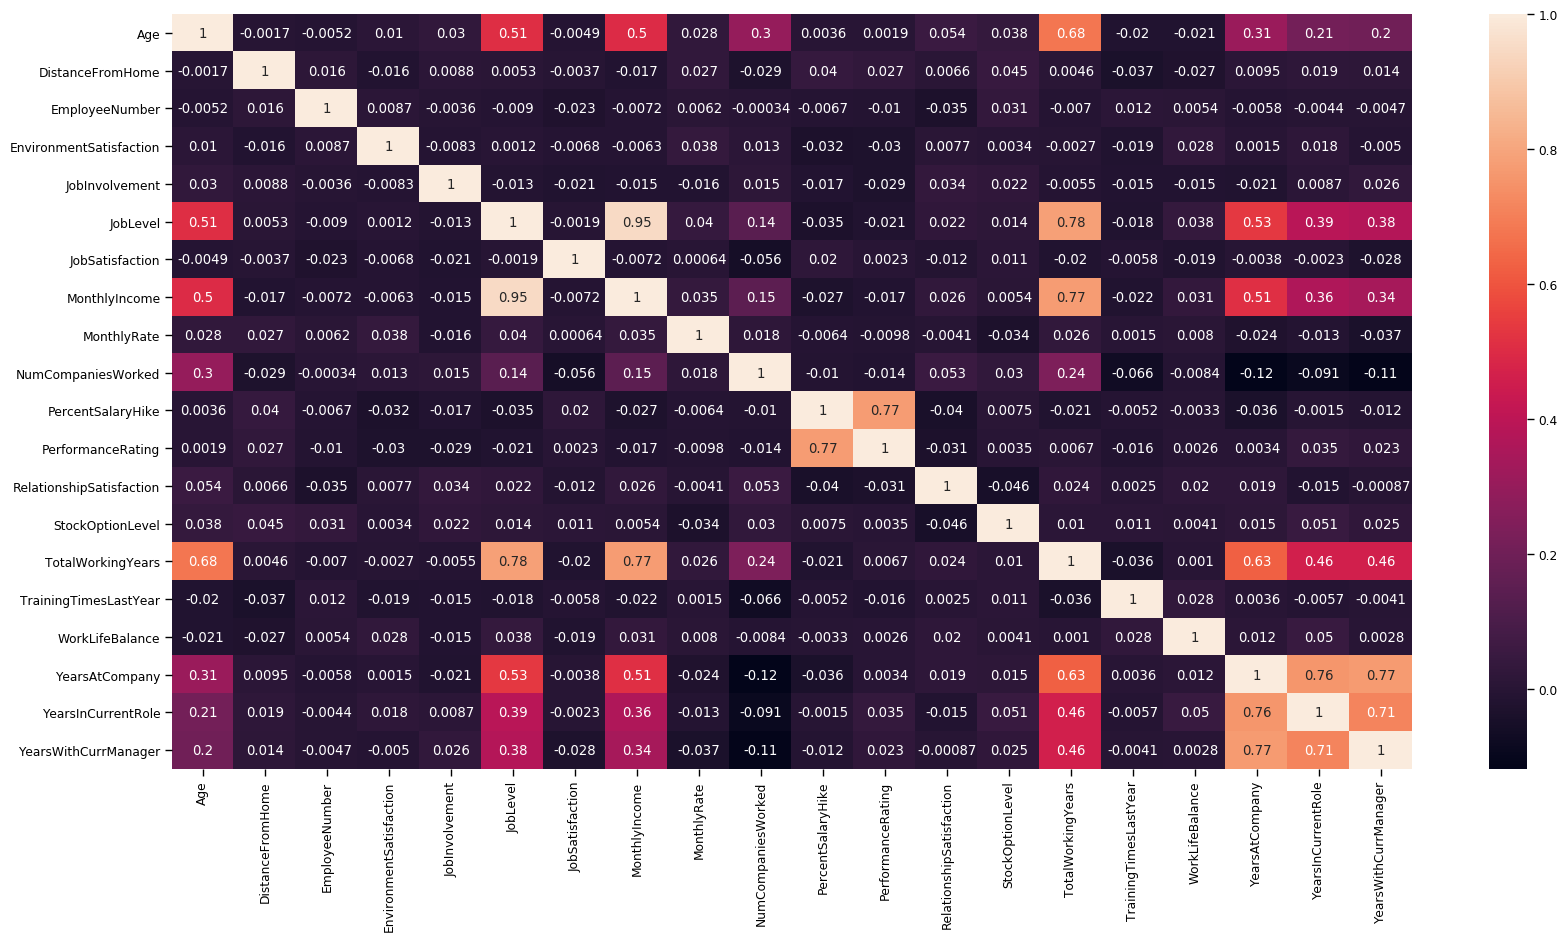

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(cormat,annot=True)

In [16]:
def correlation(dataset, threshold):
    col_corr = set()
    cormat = dataset.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if (cormat.iloc[i,j]) > threshold:
                col_name = cormat.columns[i]
                col_corr.add(col_name)
    return col_corr

In [17]:
correlation(attrition_data, 0.75)
# Monthly Income are highly correlated with Job Level.
# that is any one column drop.
# now job Level Column drop

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [18]:
# Highly related column drop for further analysis
attrition_data = attrition_data.drop(['JobLevel','PerformanceRating','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'] ,axis = 1)

In [19]:
attrition_data = attrition_data.set_index('EmployeeNumber')

In [20]:
attrition_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Life Sciences,2,3,Sales Executive,4,...,19479,8,Y,Yes,11,1,0,0,1,6
2,49,No,Travel_Frequently,Research & Development,8,Life Sciences,3,2,Research Scientist,2,...,24907,1,Y,No,23,4,1,3,3,10
3,37,Yes,Travel_Rarely,Research & Development,2,Other,4,2,Laboratory Technician,3,...,2396,6,Y,Yes,15,2,0,3,3,0
4,33,No,Travel_Frequently,Research & Development,3,Life Sciences,4,3,Research Scientist,3,...,23159,1,Y,Yes,11,3,0,3,3,8
5,27,No,Travel_Rarely,Research & Development,2,Medical,1,3,Laboratory Technician,2,...,16632,9,Y,No,12,4,1,3,3,2


## Data Preprocessing

In [38]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,Y,Yes,11,1,0,0,1,6,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,Y,No,23,4,1,3,3,10,1
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,6,Y,Yes,15,2,0,3,3,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,1,Y,Yes,11,3,0,3,3,8,3
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,9,Y,No,12,4,1,3,3,2,2


In [126]:
import time 
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve,auc, classification_report

In [127]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [128]:
encoded_df = preprocessor(attrition_data)

X = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

## Split the data into Train-Test

In [129]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [130]:
X_train

array([[42,  0,  0, ...,  3,  4,  4],
       [31,  1,  2, ...,  3,  4,  1],
       [60,  2,  1, ...,  2,  4,  1],
       ...,
       [51,  1,  2, ...,  5,  3,  4],
       [51,  1,  1, ...,  1,  2, 13],
       [29,  2,  1, ...,  5,  3,  4]], dtype=int64)

## Build Decision Tree Classifier

In [131]:
dec_mod = DecisionTreeClassifier()

In [132]:
dec_mod.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
dec_mod_score_train = dec_mod.score(X_train, y_train)
print("Training score: ",dec_mod_score_train)
dec_mod_score_test = dec_mod.score(X_test, y_test)
print("Testing score: ",dec_mod_score_test)

Training score:  1.0
Testing score:  0.9489795918367347


## Hyper-Parameter Optimization using GridSearchCV

In [134]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [4, 6, 8,10,20,30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(dec_mod, cv = 10,
                     param_grid=param_dist)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto'}
Time taken in grid search:  2.66


In [135]:
# Set best parameters given by grid search 
dec_mod.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 20)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [136]:
dec_mod.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predictions

In [137]:
y_pred = dec_mod.predict(X_test)

In [138]:
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

## Accuracy Score

In [139]:
accuracy_score(y_test, y_pred)

0.95578231292517

## Performance Metrics

In [140]:
fpr_dt,tpr_dt, _= roc_curve(y_test,y_pred)
roc_auc_dt = auc(fpr_dt,tpr_dt)

<function matplotlib.pyplot.show(*args, **kw)>

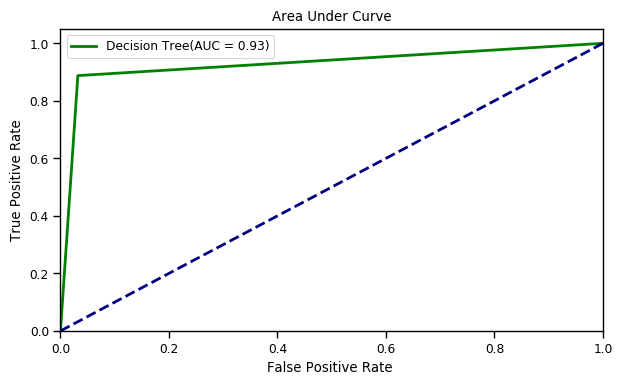

In [141]:
plt.figure(1)
plt.plot(fpr_dt,tpr_dt,color = 'green',
        lw = 2, label = 'Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc = 'upper left')
plt.show

## Confusion Matrix

In [142]:
conf_mat = confusion_matrix(y_test, y_pred)
print (conf_mat)

[[483  16]
 [ 10  79]]


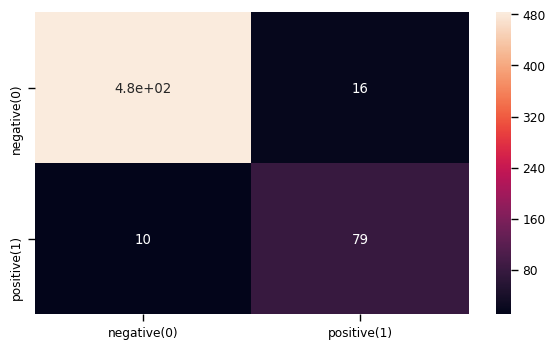

In [143]:
sns.heatmap(conf_mat,annot = True,xticklabels = ['negative(0)','positive(1)'], yticklabels = ['negative(0)','positive(1)'])

## Recall Score

In [144]:
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.8876404494382022


## Precision Score

In [145]:
print("Precision:",precision_score(y_test, y_pred))

Precision: 0.8315789473684211


## Classification Report

In [146]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97       499\n           1       0.83      0.89      0.86        89\n\n    accuracy                           0.96       588\n   macro avg       0.91      0.93      0.92       588\nweighted avg       0.96      0.96      0.96       588\n'

## Using Random Forest Classifier

In [60]:
import time 
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

In [61]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [62]:
encoded_df = preprocessor(attrition_data)

X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']

## Split The Data

In [77]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Build Random Forest Classifier

In [78]:
rand_mod = RandomForestClassifier()

In [79]:
rand_mod.fit(X_train, y_train)

C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
# Training Score
rand_mod_score_train = rand_mod.score(X_train, y_train)
rand_mod_score_train

0.9961734693877551

In [81]:
# Testing Score
rand_mod_score_test = rand_mod.score(X_test, y_test)
rand_mod_score_test

0.9574829931972789

## Optimize Parameter Using Gride SearchCv

In [82]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [4, 6, 8,10,20,30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [6,12,20,30]}

cv_rf = GridSearchCV(rand_mod, cv = 10,
                     param_grid=param_dist)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 30}
Time taken in grid search:  120.72


In [83]:
# Set best parameters given by grid search 
rand_mod.set_params(criterion = 'gini',
                    max_depth = 20,
                    max_features = 'sqrt',
                    n_estimators = 30
                    )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
rand_mod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [85]:
y_pred = rand_mod.predict(X_test)

In [86]:
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

## Accuracy Score

In [87]:
accuracy_score(y_test, y_pred)

0.9727891156462585

## Performance Metrics

In [88]:
fpr_dt,tpr_dt, _= roc_curve(y_test,y_pred)
roc_auc_dt = auc(fpr_dt,tpr_dt)

<function matplotlib.pyplot.show(*args, **kw)>

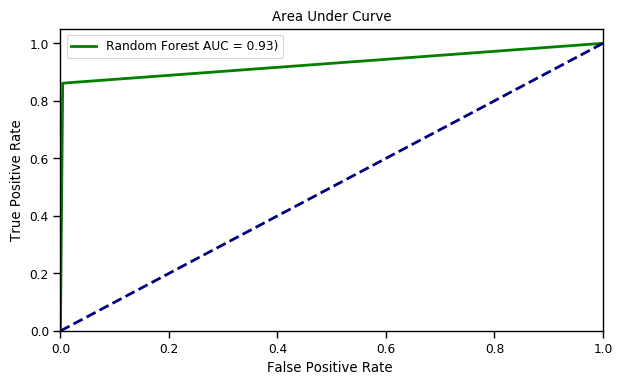

In [89]:
plt.figure(1)
plt.plot(fpr_dt,tpr_dt,color = 'green',
        lw = 2, label = 'Random Forest AUC = %0.2f)' % roc_auc_dt)
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc = 'upper left')
plt.show

## Confusion Matrix

In [90]:
conf_mat = confusion_matrix(y_test, y_pred)
print (conf_mat)

[[485   2]
 [ 14  87]]


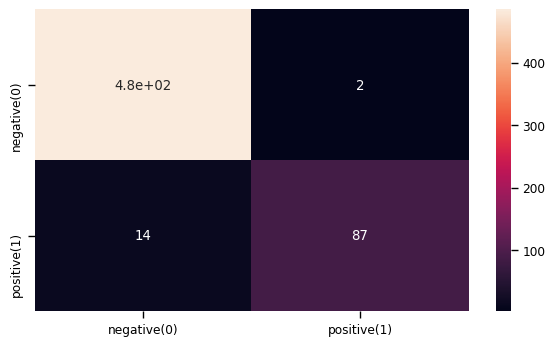

In [91]:
sns.heatmap(conf_mat,annot = True,xticklabels = ['negative(0)','positive(1)'], yticklabels = ['negative(0)','positive(1)'])

## Recall Score

In [92]:
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.8613861386138614


## Precision Score

In [93]:
print("Precision:",precision_score(y_test, y_pred))

Precision: 0.9775280898876404


## Classification Report

In [94]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       487\n           1       0.98      0.86      0.92       101\n\n    accuracy                           0.97       588\n   macro avg       0.97      0.93      0.95       588\nweighted avg       0.97      0.97      0.97       588\n'

## Using Logistic Regression

In [95]:
import time 
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Preprocessing

In [98]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [99]:
encoded_df = preprocessor(attrition_data)

X = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

## Standardization & Scaling of Features

In [100]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Train Test Split

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Logistic Regression Model

In [114]:
log_mod = LogisticRegression()

In [115]:
log_mod.fit(X_train,y_train)

C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [116]:
y_pred = log_mod.predict(X_test)

In [117]:
y_pred[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

## Accuracy Score

In [118]:
accuracy_score(y_test, y_pred)

0.8792517006802721

## Performance Metrics

In [119]:
fpr_dt,tpr_dt, _= roc_curve(y_test,y_pred)
roc_auc_dt = auc(fpr_dt,tpr_dt)

<function matplotlib.pyplot.show(*args, **kw)>

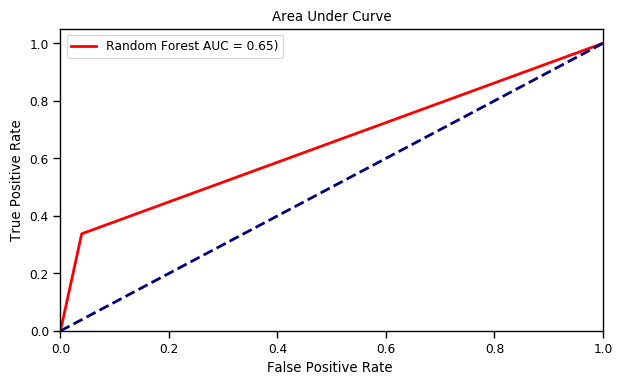

In [120]:
plt.figure(1)
plt.plot(fpr_dt,tpr_dt,color = 'red',
        lw = 2, label = 'Random Forest AUC = %0.2f)' % roc_auc_dt)
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc = 'upper left')
plt.show

## Confusion Matrix

In [121]:
conf_mat = confusion_matrix(y_test, y_pred)
print (conf_mat)

[[491  20]
 [ 51  26]]


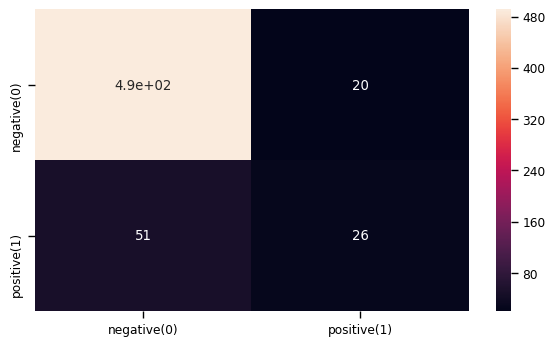

In [122]:
sns.heatmap(conf_mat,annot = True,xticklabels = ['negative(0)','positive(1)'], yticklabels = ['negative(0)','positive(1)'])

## Recall Score

In [123]:
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.33766233766233766


## Precision Score

In [124]:
print("Precision:",precision_score(y_test, y_pred))

Precision: 0.5652173913043478


## Classification Report

In [125]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.96      0.93       511\n           1       0.57      0.34      0.42        77\n\n    accuracy                           0.88       588\n   macro avg       0.74      0.65      0.68       588\nweighted avg       0.86      0.88      0.87       588\n'

# Conclusion

## From The above Three Model(Decision Tree Model, Random Forest Model, Logistic Regression Model) 
## The Random Forest Model has High Accuracy and Best Confusion Matrix Compaired to Other Model.
## Thats why We select Random Forest classifier